# Importing libraries

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('updated_lending_club_loans.csv')

In [3]:
data.head(1)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,loan_status
0,0,5000.0,5000.0,4975.0,162.87,2,7,0,24000.0,1


In [4]:
data.columns

Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'loan_status'],
      dtype='object')

# Splitting x & y data

In [5]:
x = data.drop(['Unnamed: 0','loan_status'],axis=1)

In [6]:
x

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc
0,5000.0,5000.0,4975.0,162.87,2,7,0,24000.0
1,2500.0,2500.0,2500.0,59.83,3,13,0,30000.0
2,2400.0,2400.0,2400.0,84.33,3,15,0,12252.0
3,10000.0,10000.0,10000.0,339.31,3,5,0,49200.0
4,5000.0,5000.0,5000.0,156.46,1,1,0,36000.0
...,...,...,...,...,...,...,...,...
39233,2500.0,2500.0,1075.0,78.42,1,1,1,110000.0
39234,8500.0,8500.0,875.0,275.38,3,5,0,18000.0
39235,5000.0,5000.0,1325.0,156.84,1,1,1,100000.0
39236,5000.0,5000.0,650.0,155.38,1,11,1,200000.0


In [7]:
y = data['loan_status']
y

0        1
1        0
2        1
3        1
4        1
        ..
39233    1
39234    1
39235    1
39236    1
39237    1
Name: loan_status, Length: 39238, dtype: int64

In [8]:

x.shape

(39238, 8)

In [9]:
y.shape

(39238,)

# Preparing training & testing data

In [10]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [11]:
X_train.shape

(27466, 8)

In [12]:
y_train.shape

(27466,)

In [13]:
y_test.shape

(11772,)

In [14]:
X_test.shape

(11772, 8)

# Logistic Regression Model Fitting

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train,y_train)

LogisticRegression()

# Accuracy of Training set

In [34]:
train_acc = model.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 85.4984344280201


# Predicting the test set results and calculating the accuracy

In [17]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [18]:
y_pred.shape

(11772,)

# Confusion Matrix

In [19]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[    9  1668]
 [   10 10085]]


# Compute precision, recall, F-measure and support

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.01      0.01      1677
           1       0.86      1.00      0.92     10095

    accuracy                           0.86     11772
   macro avg       0.67      0.50      0.47     11772
weighted avg       0.80      0.86      0.79     11772



In [21]:
y_test

28165    1
37244    1
37535    1
18216    1
11541    1
        ..
9378     1
6431     1
7969     1
35691    1
5771     0
Name: loan_status, Length: 11772, dtype: int64

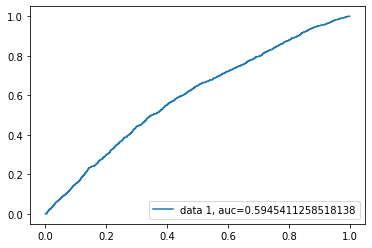

In [24]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [27]:
y_test.value_counts()

1    10095
0     1677
Name: loan_status, dtype: int64